In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df["availability"].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [9]:
df["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [10]:
df["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df.groupby("area_type")["price"].mean().sort_values(ascending=False)

area_type
Plot  Area              208.495486
Built-up  Area          104.285498
Super built-up  Area     92.971757
Carpet  Area             89.502356
Name: price, dtype: float64

In [13]:
df.drop(columns = ["availability" , "society" , "balcony"], inplace=True)

In [14]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df["area_type"] = df["area_type"].str.slice(0,-6)

In [16]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [17]:
df["location"] = df["location"].fillna("Whitefield")

In [18]:
df["size"] = df["size"].fillna("2 BHK")

In [19]:
df["bath"] = df["bath"].fillna(df["bath"].median())

In [20]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up,Kothanur,2 BHK,1200,2.0,51.00


In [22]:
df["bhk"] = df["size"].str.split().str.get(0)

In [23]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up,Kothanur,2 BHK,1200,2.0,51.00,2


In [24]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
df["total_sqft"].str.contains("-").sum()

201

In [26]:
def removehyphan(x):
    temp = x.split("-")
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except: return None

In [27]:
df["total_sqft"] = df["total_sqft"].apply(removehyphan)

In [28]:
df["per_sqft_price"] = df["price"] *100000 / df["total_sqft"]

In [29]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Super built-up,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
df["location"].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [31]:
df["location"] = df["location"].apply(lambda x: x.strip())

In [32]:
location_count = df["location"].value_counts()

In [33]:
less_10 = df["location"].value_counts()[location_count <= 10]

In [34]:
df["location"] = df["location"].apply(lambda x : "other" if x in less_10 else x)

In [35]:
df["location"].value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [36]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Super built-up,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
df.shape

(13320, 8)

In [38]:
df.describe()

,total_sqft,bath,price,per_sqft_price
count,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,7.907501e+03
std,1238.405258,1.338754,148.971674,1.064296e+05
min,1.000000,1.000000,8.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,1.200000e+07


In [39]:
df["bhk"] = df["bhk"].astype(int)

In [40]:
df[df.total_sqft/df.bhk<300].head()

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
9,Plot,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [41]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12576, 8)

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.per_sqft_price)
        st = np.std(subdf.per_sqft_price)
        reduced_df = subdf[(subdf.per_sqft_price>(m-st)) & (subdf.per_sqft_price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10301, 8)

In [43]:
df.shape

(10301, 8)

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sqft_price),
                'std': np.std(bhk_df.per_sqft_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sqft_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7361, 8)

<Axes: >

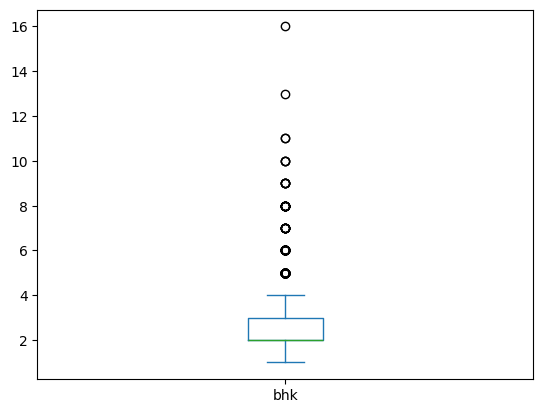

In [45]:
df["bhk"].astype(int).plot(kind="box")

In [46]:
df["bhk"] = df["bhk"].astype(int)

In [47]:
df = df[df["bhk"] <= 7]

In [48]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Super built-up,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [49]:
df.shape

(7335, 8)

In [50]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Super built-up,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [51]:
df.drop(columns = ["size" , "per_sqft_price" ,"area_type"] , inplace=True)

In [52]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [53]:
df.to_csv("cleaned_data.csv")

In [54]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['price' ]),df['price'],test_size=.2,random_state=2)

In [68]:
df.loc[699]

location      Banashankari
total_sqft          1330.0
bath                   2.0
price                 78.0
bhk                      2
Name: 699, dtype: object

In [65]:
X_test

,location,total_sqft,bath,bhk
9743,other,4382.0,4.0,4
6315,Sarjapur Road,1691.0,3.0,3
6503,Sonnenahalli,1268.0,2.0,2
7049,Uttarahalli,1345.0,2.0,3
1934,Electronic City,1128.0,2.0,2
...,...,...,...,...
5188,Mysore Road,1060.0,2.0,2
7710,Yelachenahalli,1365.0,2.0,3
720,Banashankari,1185.0,2.0,2
3309,Hormavu,1081.5,2.0,2


In [55]:
one_hot_transformer = ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(drop='first',sparse_output=False,dtype=int,handle_unknown='ignore'),['location'])
],remainder='passthrough')

In [56]:
scaler = StandardScaler()

In [57]:
lr = LinearRegression()
pipe_lr = make_pipeline(one_hot_transformer,scaler,lr)
pipe_lr.fit(X_train,y_train)

C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [58]:
y_pred_lr = pipe_lr.predict(X_test)
r2_score(y_test,y_pred_lr)

0.8337869738917515

In [59]:
lasso = Lasso()
pipe_lasso = make_pipeline(one_hot_transformer,scaler,lasso)
pipe_lasso.fit(X_train,y_train)

C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [60]:
y_pred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8250037929176731

In [61]:
ridge = Ridge()
pipe_ridge = make_pipeline(one_hot_transformer,scaler,ridge)
pipe_ridge.fit(X_train,y_train)

C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [62]:
y_pred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8344435104872379

In [63]:
import pickle

In [64]:
pickle.dump(pipe_ridge , open("model1.pkl" , "wb"))